In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)


In [ ]:
data = pd.read_csv("/content/iris.csv")

In [ ]:
data.head()
print("Dimension of dataset:", data.shape)

Dimension of dataset: (150, 5)


In [ ]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isna().sum

<bound method DataFrame.sum of      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

In [ ]:
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:

# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.species.value_counts()


virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

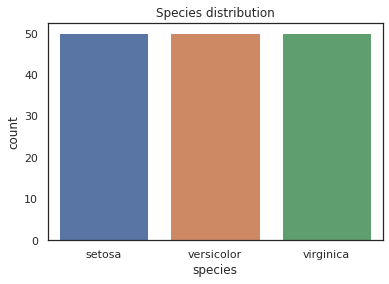

In [ ]:
#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

In [ ]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['species']= label_encoder.fit_transform(data['species'])

In [ ]:
#Check unique value of species
data['species'].unique()

array([0, 1, 2])

In [ ]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


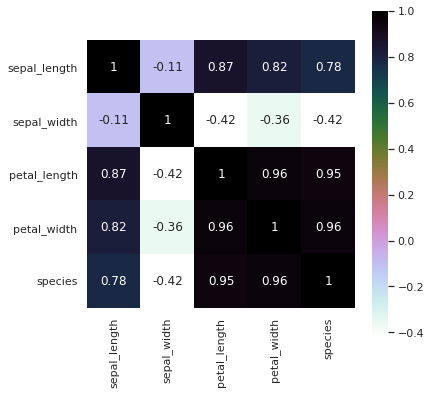

In [ ]:
#heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
# Absolute correlation value with species(Target variable)

abs(corr['species'])[:-1].sort_values(ascending = False)

petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width     0.419446
Name: species, dtype: float64

In [ ]:
 #Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30)
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species']
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


In [ ]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predict Species for test data
pred = clf.predict(test_x)
pred

array([0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2,
       2])

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 91.11%


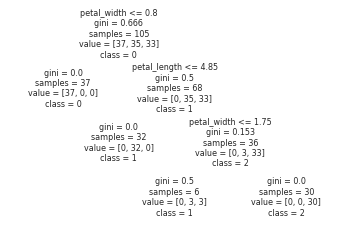

In [ ]:
#Model Visualization
from sklearn import tree

tree.plot_tree(clf,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [ ]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(clf, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_length <= 4.85
|   |   |--- class: 1
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.75
|   |   |   |--- class: 2



In [ ]:
#Using Decision Tree Classifier for model building by "entropy"

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predict Species for test data
pred1 = clf1.predict(test_x)
pred1

array([0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2,
       2])

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred1,test_y)*100,2)))

The accuracy of the Decision Tree is 91.11%


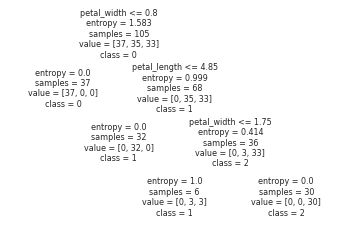

In [ ]:
##Model visualization
from sklearn import tree

tree.plot_tree(clf1,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [ ]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(clf1, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_length <= 4.85
|   |   |--- class: 1
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.75
|   |   |   |--- class: 2

